Atividades sobre Preço Inicial de jogos x Data de lançamento

Aluno: Bruno Felipe Soares Santos
bfss@cesar.school

A base de dados é do Kaggle, e foram removidos jogos grátis e com valor zerado devido a dados faltantes.

https://www.kaggle.com/datasets/thedevastator/get-your-game-on-metacritic-recommendations-and

# Import de biliotecas

In [ ]:
!pip install statsmodels scikit-learn matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Import de dataset e tratamento

In [ ]:
# Carregando o dataset
df = pd.read_csv('/content/games-features-edit.csv', sep=';')

In [ ]:
# Convertendo a coluna 'ReleaseDate' para datetime
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], format='%b %d %Y')

In [ ]:
df = df[~((df['IsFree'] == True) & (df['PriceInitial'] == 0))]

In [ ]:
df.head()

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
0,Counter-Strike,2000-11-01,88,68991,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
1,Team Fortress Classic,1999-04-01,0,2439,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
2,Day of Defeat,2003-05-01,79,2319,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
3,Deathmatch Classic,2001-06-01,0,888,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
4,Half-Life: Opposing Force,1999-11-01,0,2934,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99


In [ ]:
# Agrupando por ano para calcular o preço médio inicial por ano
df['Year'] = df['ReleaseDate'].dt.year
df['Month'] = df['ReleaseDate'].dt.month
df_grouped = df.groupby('Year')['PriceInitial'].mean()

In [ ]:
df_grouped.head()

,PriceInitial
Year,
1997,9.99
1998,9.99
1999,4.99
2000,7.49
2001,12.49


# Split

In [ ]:
# Dividindo os dados em treino e teste (80% para treino, 20% para teste)
train_size = int(len(df_grouped) * 0.8)
train, test = df_grouped[:train_size], df_grouped[train_size:]

In [ ]:
# Função para calcular as métricas de avaliação
def evaluate_model(actual, predicted):
    mse_val = mean_squared_error(actual, predicted)
    rmse_val = np.sqrt(mse_val)
    mae_val = mean_absolute_error(actual, predicted)
    mape_val = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mse_val, rmse_val, mae_val, mape_val

# ARIMA

In [ ]:
# Criando o modelo ARIMA
# Definindo a ordem do ARIMA como (1, 1, 1) - p=1, d=1, q=1
model_arima = ARIMA(train, order=(1, 1, 1))
model_arima_fit = model_arima.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [ ]:
# Fazendo a previsão com o modelo ARIMA
forecast_arima = model_arima_fit.forecast(steps=len(test))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Avaliando o modelo ARIMA
mse_arima, rmse_arima, mae_arima, mape_arima = evaluate_model(test, forecast_arima)

# SARIMA

In [ ]:
# Criando o modelo SARIMA
# Definindo a ordem do SARIMA como (1, 1, 1) x (1, 1, 1, 12)
model_sarima = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting paramete

In [ ]:
# Fazendo a previsão com o modelo SARIMA
forecast_sarima = model_sarima_fit.forecast(steps=len(test))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Avaliando o modelo SARIMA
mse_sarima, rmse_sarima, mae_sarima, mape_sarima = evaluate_model(test, forecast_sarima)

# Avaliação

In [ ]:
# Exibindo as métricas de avaliação dos modelos
print(f"ARIMA Metrics: MSE={mse_arima}, RMSE={rmse_arima}, MAE={mae_arima}, MAPE={mape_arima}")
print(f"SARIMA Metrics: MSE={mse_sarima}, RMSE={rmse_sarima}, MAE={mae_sarima}, MAPE={mape_sarima}")

ARIMA Metrics: MSE=33.31495077384801, RMSE=5.77191049600113, MAE=4.736995742666448, MAPE=nan
SARIMA Metrics: MSE=81.6677312563819, RMSE=9.037020042933506, MAE=8.491740502112595, MAPE=nan


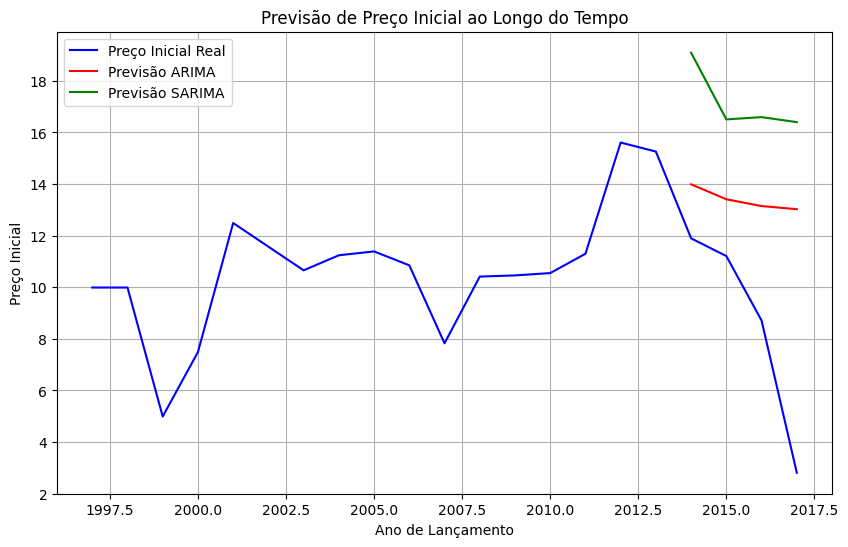

In [ ]:
# Visualizando os resultados no gráfico
plt.figure(figsize=(10,6))
plt.plot(df_grouped.index, df_grouped.values, label='Preço Inicial Real', color='blue')
plt.plot(df_grouped.index[train_size:], forecast_arima, label='Previsão ARIMA', color='red')
plt.plot(df_grouped.index[train_size:], forecast_sarima, label='Previsão SARIMA', color='green')
plt.legend(loc='best')
plt.title('Previsão de Preço Inicial ao Longo do Tempo')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Preço Inicial')
plt.grid(True)
plt.show()


A previsão ficou horrível e é isso. Tentei corrigir de todas as ofmras e não consegui melhorar muito.